In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_excel('/content/cust_data.xlsx')

In [ ]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
data['Gender'].value_counts()

Gender
F    22054
M     5222
Name: count, dtype: int64

In [ ]:
mode_value = data['Gender'].mode().iloc[0]
data['Gender'] = data['Gender'].fillna(mode_value)

In [ ]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

<Axes: >

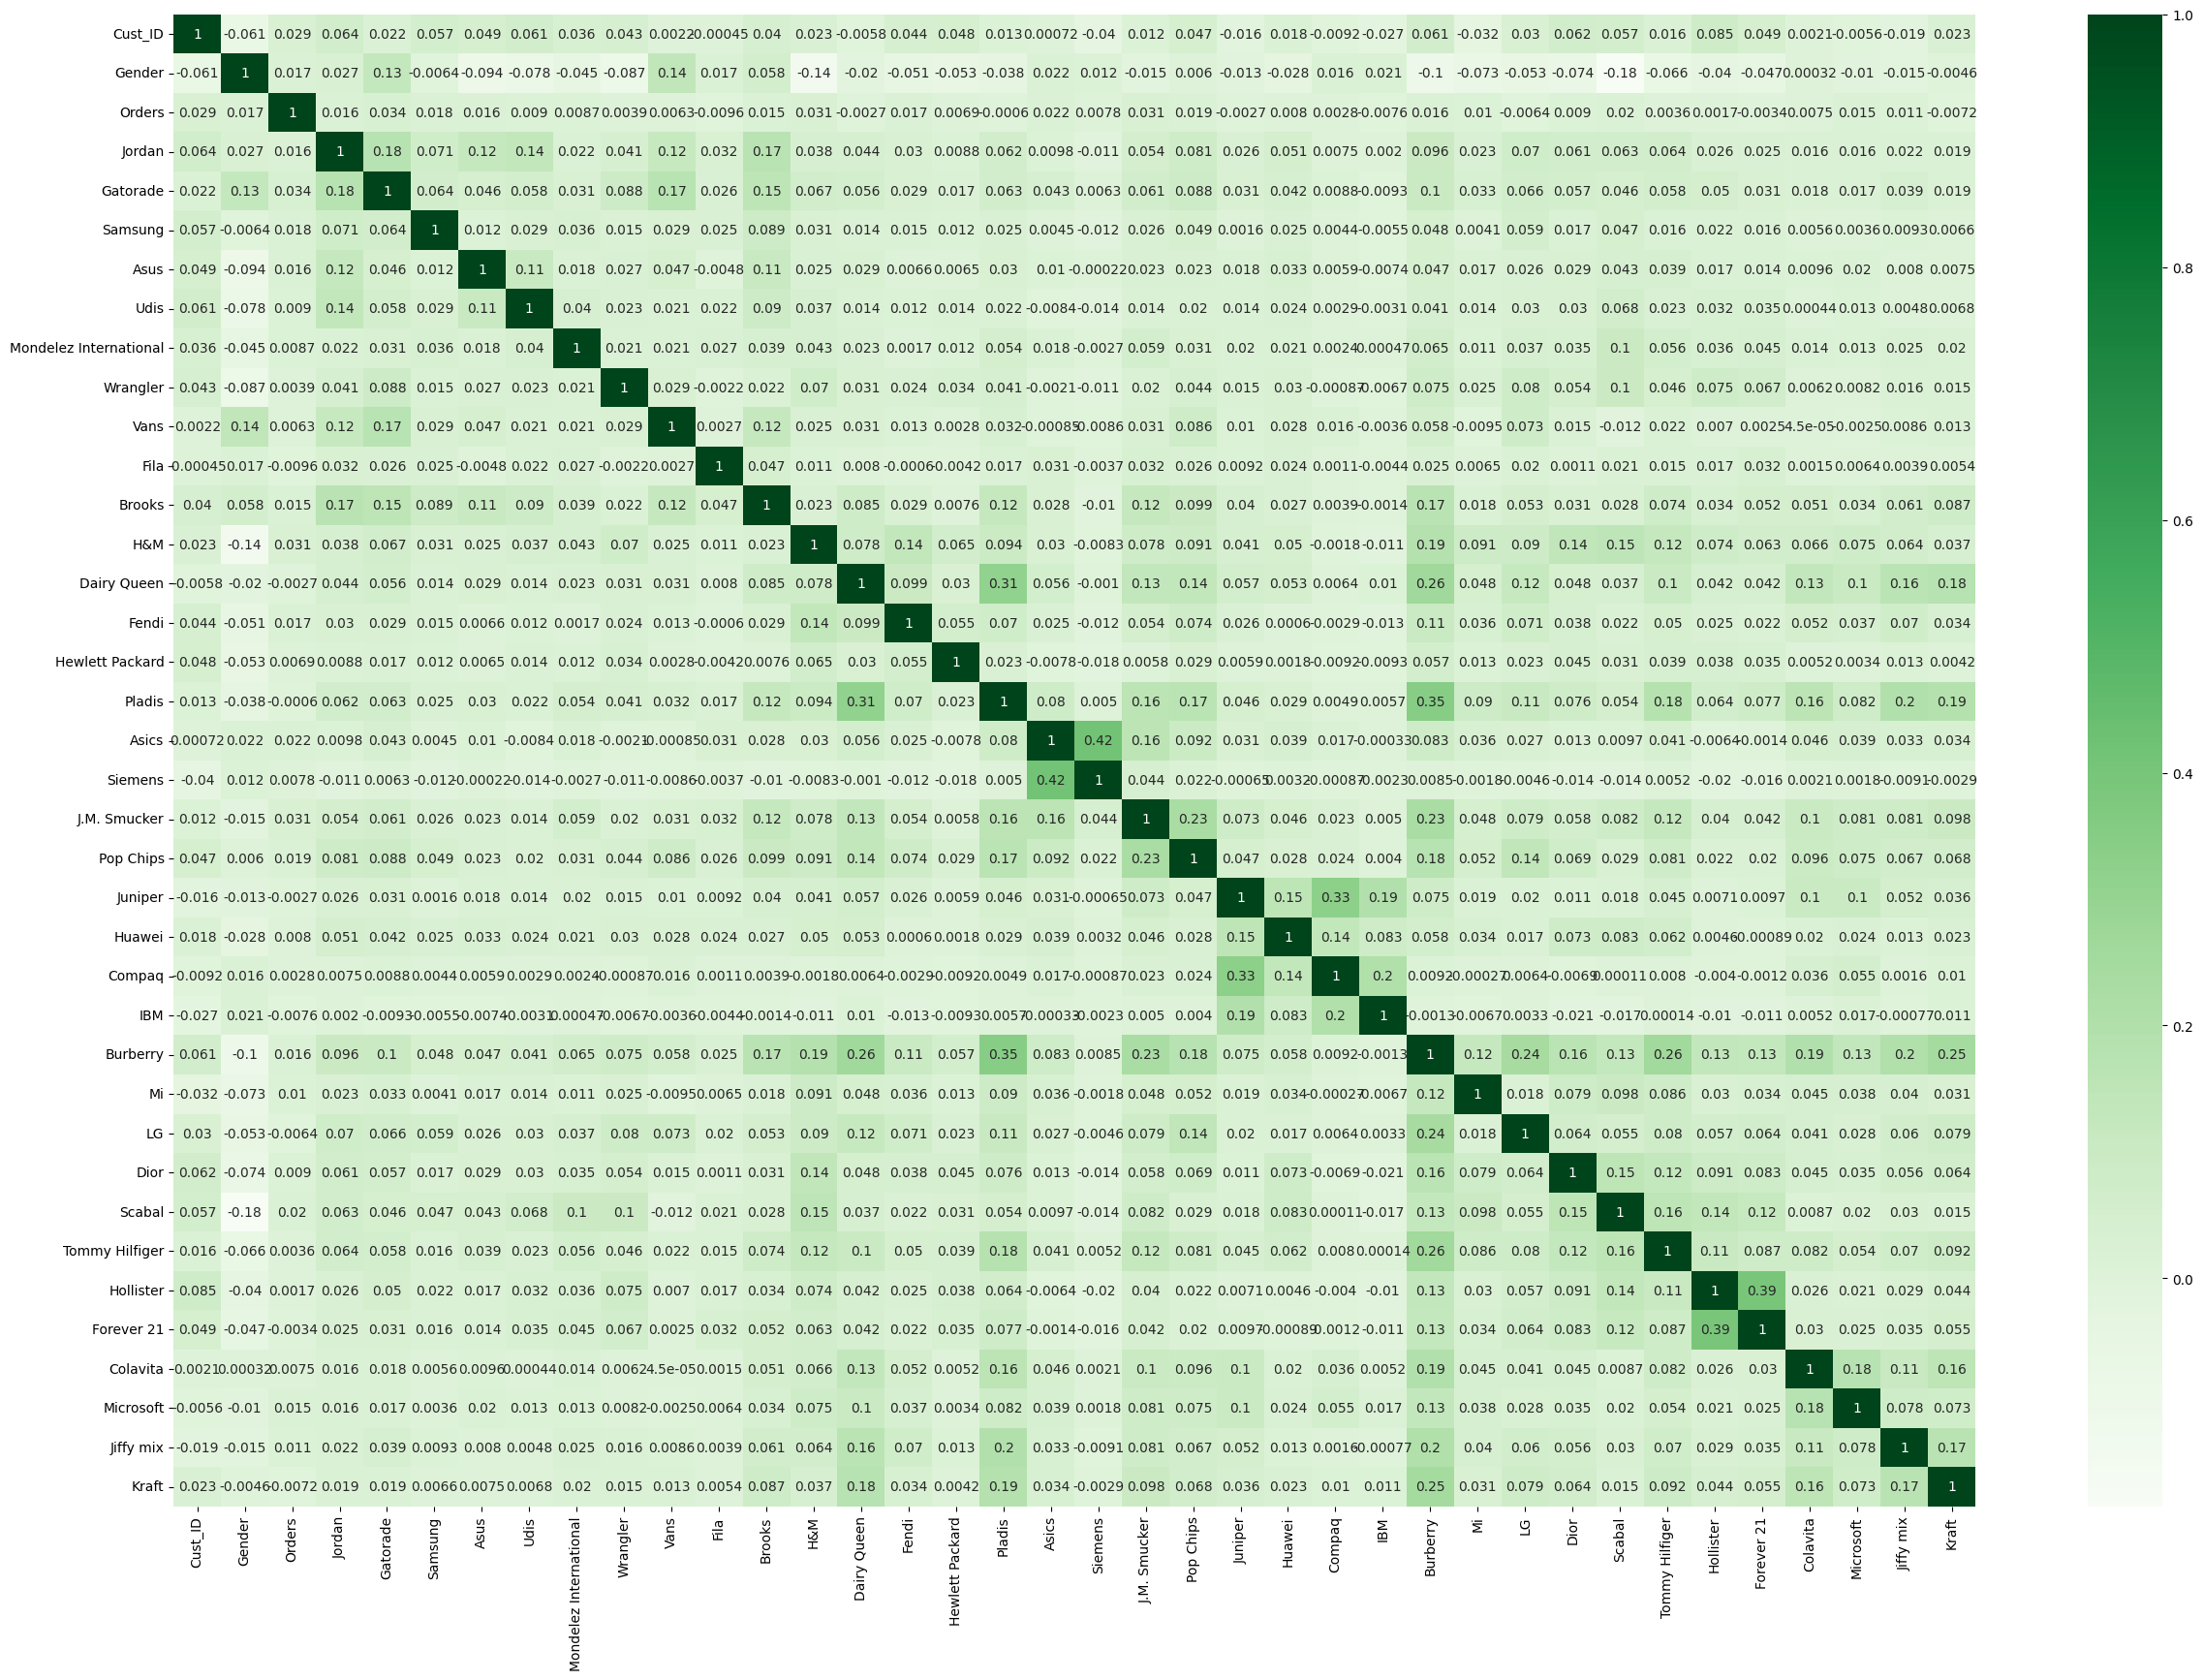

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,cmap='Greens')

In [ ]:
data.drop('Cust_ID',axis=1,inplace=True)

In [ ]:
# elbow method

inertia = []

for i in range(1,12):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)

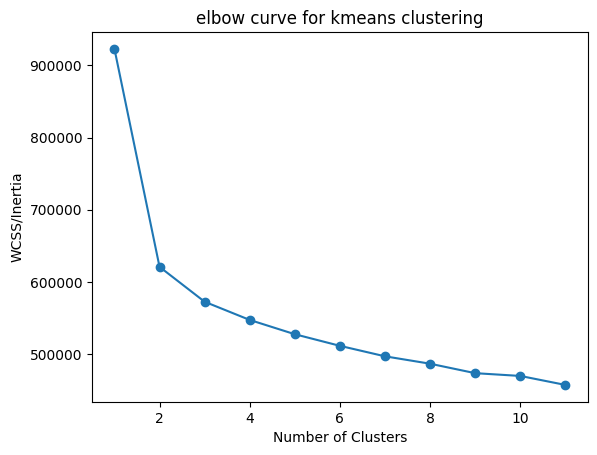

In [ ]:
plt.plot(range(1,12),inertia,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS/Inertia')
plt.title('elbow curve for kmeans clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
data['clusters'] = kmeans.labels_

In [ ]:
kmeans.n_iter_

16

In [ ]:
kmeans.cluster_centers_

array([[0.09497207, 3.16424581, 0.71061453, 0.63575419, 0.38994413,
        0.34301676, 0.24022346, 0.31061453, 0.26256983, 0.36536313,
        0.18100559, 0.56201117, 0.97541899, 2.61564246, 0.46592179,
        0.33519553, 1.12849162, 1.31620112, 0.13631285, 3.14636872,
        1.25363128, 2.76424581, 0.75307263, 0.4424581 , 0.12849162,
        3.60558659, 0.33072626, 0.61452514, 0.70167598, 0.70726257,
        0.76759777, 0.24916201, 0.20446927, 0.94189944, 0.49273743,
        0.48268156, 0.51731844],
       [0.17871018, 8.75757576, 0.26828727, 0.26751027, 0.23032523,
        0.16983017, 0.14629815, 0.14008214, 0.10500611, 0.11344211,
        0.08735709, 0.14263514, 0.34632035, 0.15517816, 0.14474414,
        0.16305916, 0.08458208, 0.2962593 , 0.05094905, 0.74991675,
        0.24531025, 0.42135642, 0.25663226, 0.11410811, 0.02564103,
        0.37906538, 0.12343212, 0.09201909, 0.27006327, 0.38195138,
        0.15295815, 0.07337107, 0.05350205, 0.18115218, 0.11166611,
        0.08547

In [ ]:
print(silhouette_score(data,kmeans.fit_predict(data)))

0.22533394443120772


In [ ]:
data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,clusters
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


<Axes: xlabel='clusters'>

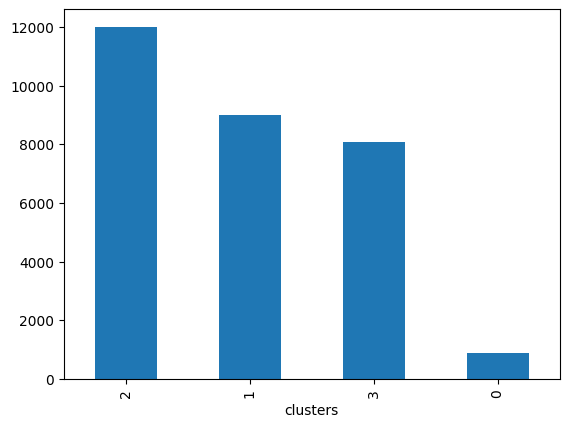

In [ ]:
data['clusters'].value_counts().plot(kind='bar')

In [ ]:
grouped = data.groupby('clusters').count()
grouped

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
clusters,,,,,,,,,,,,,,,,,,,,,
0,895,895,895,895,895,895,895,895,895,895,...,895,895,895,895,895,895,895,895,895,895
1,9009,9009,9009,9009,9009,9009,9009,9009,9009,9009,...,9009,9009,9009,9009,9009,9009,9009,9009,9009,9009
2,12003,12003,12003,12003,12003,12003,12003,12003,12003,12003,...,12003,12003,12003,12003,12003,12003,12003,12003,12003,12003
3,8093,8093,8093,8093,8093,8093,8093,8093,8093,8093,...,8093,8093,8093,8093,8093,8093,8093,8093,8093,8093


In [ ]:
agg_functions = {'Orders': 'count'}

# Perform group by based on clusters and apply custom aggregation functions
grouped_data = data.groupby('clusters').count()

In [ ]:
grouped_data

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
clusters,,,,,,,,,,,,,,,,,,,,,
0,895,895,895,895,895,895,895,895,895,895,...,895,895,895,895,895,895,895,895,895,895
1,9009,9009,9009,9009,9009,9009,9009,9009,9009,9009,...,9009,9009,9009,9009,9009,9009,9009,9009,9009,9009
2,12003,12003,12003,12003,12003,12003,12003,12003,12003,12003,...,12003,12003,12003,12003,12003,12003,12003,12003,12003,12003
3,8093,8093,8093,8093,8093,8093,8093,8093,8093,8093,...,8093,8093,8093,8093,8093,8093,8093,8093,8093,8093


In [ ]:
# Group by 'Category' column and compute mean, sum, and count for 'Value' column
result = data.groupby('clusters')['Orders'].agg(['count'])


In [ ]:
result

,count
clusters,
0,895
1,9009
2,12003
3,8093


In [ ]:
result = data.groupby('Gender')['Orders'].agg(['count'])

In [ ]:
avg_purchases = data.groupby('clusters').mean(numeric_only=True)

In [ ]:
avg_purchases

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.094972,3.164246,0.710615,0.635754,0.389944,0.343017,0.240223,0.310615,0.262570,0.365363,...,0.614525,0.701676,0.707263,0.767598,0.249162,0.204469,0.941899,0.492737,0.482682,0.517318
1,0.178710,8.757576,0.268287,0.267510,0.230325,0.169830,0.146298,0.140082,0.105006,0.113442,...,0.092019,0.270063,0.381951,0.152958,0.073371,0.053502,0.181152,0.111666,0.085470,0.058719
2,0.168874,0.601516,0.230859,0.204366,0.195035,0.139798,0.133217,0.124802,0.096393,0.094810,...,0.091394,0.250937,0.340332,0.134883,0.067566,0.049988,0.163293,0.096226,0.067983,0.057069
3,0.185345,4.466205,0.271716,0.264179,0.237613,0.163722,0.145064,0.142716,0.107500,0.105770,...,0.074138,0.254665,0.363648,0.134066,0.078463,0.056221,0.164463,0.109848,0.076980,0.055604


In [ ]:
pd.crosstab(data['clusters'],data['Orders'])

Orders,0,1,2,3,4,5,6,7,8,9,10,11,12
clusters,,,,,,,,,,,,,
0,208,102,119,101,97,81,68,40,37,14,22,6,0
1,0,0,0,0,0,0,0,2167,2043,1979,1916,435,469
2,7086,2614,2303,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2098,2095,1929,1971,0,0,0,0,0,0


In [ ]:
sum_purchases = data.groupby('clusters').sum(numeric_only=True)
sum_purchases

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
clusters,,,,,,,,,,,,,,,,,,,,,
0,85,2832,636,569,349,307,215,278,235,327,...,550,628,633,687,223,183,843,441,432,463
1,1610,78897,2417,2410,2075,1530,1318,1262,946,1022,...,829,2433,3441,1378,661,482,1632,1006,770,529
2,2027,7220,2771,2453,2341,1678,1599,1498,1157,1138,...,1097,3012,4085,1619,811,600,1960,1155,816,685
3,1500,36145,2199,2138,1923,1325,1174,1155,870,856,...,600,2061,2943,1085,635,455,1331,889,623,450
